<a href="https://colab.research.google.com/github/ruchithareddy296/2216139_AIML_BootCamp/blob/main/assignment8(all_algorithms).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#step1
dataset="/content/drive/MyDrive/SUV_Purchase.csv"
import pandas as pd

df=pd.read_csv(dataset)

In [2]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [5]:
df.shape

(400, 5)

In [6]:
#data processing
from sklearn import preprocessing  
#labelencoding
LE=preprocessing.LabelEncoder()
#fitting it to our dataset
df.Gender=LE.fit_transform(df.Gender)

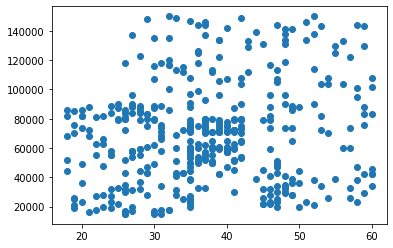

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df.Age,df.EstimatedSalary)
plt.show()

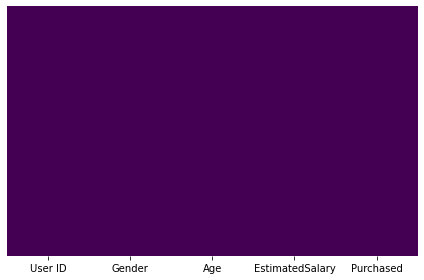

In [8]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [9]:
WIDTH  = 10
HEIGHT = 3

def plot_vs(frame, col1, col2, hue):
    plt.figure(figsize=(WIDTH, HEIGHT * 2))
    sns.scatterplot(data=frame, x=col1, y=col2, hue=hue)
    plt.title(f"Scatter plot | {col1} vs {col2}")
    plt.show()

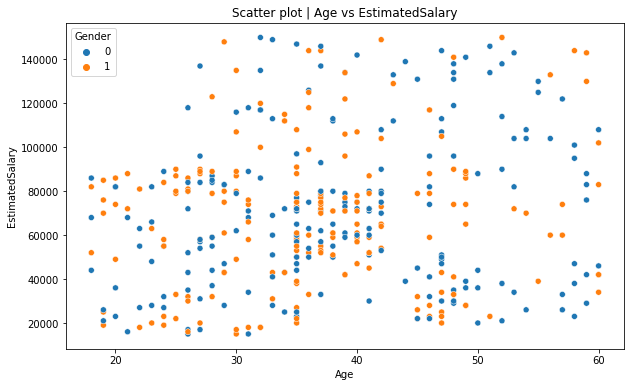

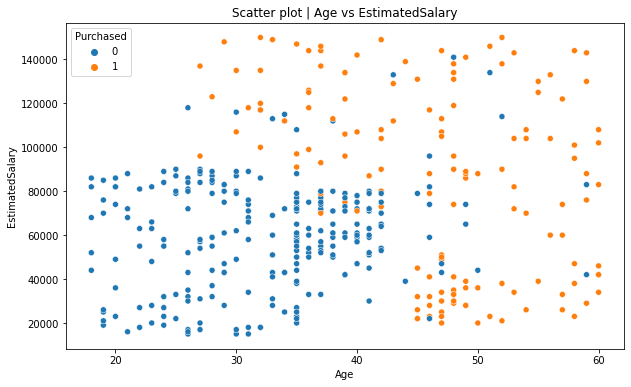

In [10]:
plot_vs(df, 'Age', 'EstimatedSalary', 'Gender')
plot_vs(df, 'Age', 'EstimatedSalary', 'Purchased')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


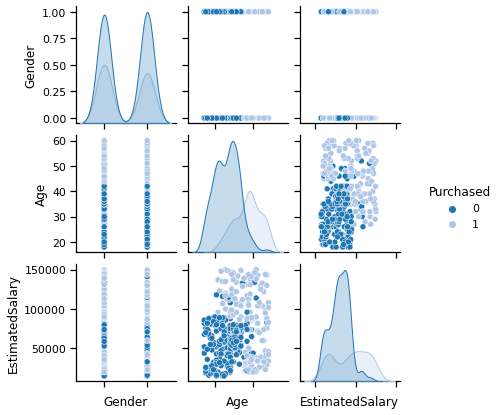

In [11]:
#Understanding the Distribution with Seaborn
import seaborn as sns
with sns.plotting_context("notebook",font_scale=1):
  g = sns.pairplot(df[['Gender','Age','EstimatedSalary','Purchased']],hue='Purchased',palette='tab20',size=2)
g.set(xticklabels=[])

In [12]:
from matplotlib.axis import YTick
#method 2 to load the data in the form of arrays -by library numpy
import numpy as np
X=np.array(df[['Age','EstimatedSalary']])
Y=np.array(df[['Purchased']])

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [16]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [17]:
model1.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
y_pred=model1.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [19]:
print("Predicted value for training data(logistic):",model1.score(X_train,Y_train)*100)

Predicted value for training data(logistic): 83.75


In [20]:
print("Predicted value for testing data(logistic):",model1.score(X_test,Y_test)*100)

Predicted value for testing data(logistic): 86.25


In [21]:
accuracy=model1.score(X,Y)*100
print(accuracy)

84.25


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()

In [23]:
model2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [24]:
y_pred=model2.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [25]:
print("Predicted value for training data(knn):",model2.score(X_train,Y_train)*100)
print("Predicted value for testing data(knn):",model2.score(X_test,Y_test)*100)
accuracy=model2.score(X,Y)*100
print(accuracy)

Predicted value for training data(knn): 92.1875
Predicted value for testing data(knn): 87.5
91.25


In [26]:
from sklearn.naive_bayes import GaussianNB
model3=GaussianNB()

In [27]:
model3.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [28]:
y_pred=model3.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [29]:
print("Predicted value for training data(NB):",model3.score(X_train,Y_train)*100)
print("Predicted value for testing data(NB):",model3.score(X_test,Y_test)*100)
accuracy=model3.score(X,Y)*100
print(accuracy)

Predicted value for training data(NB): 89.375
Predicted value for testing data(NB): 88.75
89.25


In [30]:
from sklearn.svm import SVC
model4=SVC()

In [31]:
model4.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [32]:
y_pred=model4.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [33]:
print("Predicted value for training data (svm):",model4.score(X_train,Y_train)*100)
print("Predicted value for testing data (svm):",model4.score(X_test,Y_test)*100)
accuracy=model4.score(X,Y)*100
print(accuracy)

Predicted value for training data (svm): 90.625
Predicted value for testing data (svm): 93.75
91.25


In [34]:
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()

In [35]:
model5.fit(X_train,Y_train)

DecisionTreeClassifier()

In [36]:
y_pred=model5.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [37]:
print("Predicted value for training data (DecisionTreeClassifier):",model5.score(X_train,Y_train)*100)
print("Predicted value for testing data (DecisionTreeClassifier):",model5.score(X_test,Y_test)*100)
accuracy=model5.score(X,Y)*100
print(accuracy)

Predicted value for training data (DecisionTreeClassifier): 99.6875
Predicted value for testing data (DecisionTreeClassifier): 86.25
97.0


In [38]:
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()

In [39]:
model6.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [40]:
y_pred=model6.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [41]:
print("Predicted value for training data (RandomForestClassifier):",model6.score(X_train,Y_train)*100)
print("Predicted value for testing data (RandomForestClassifier):",model6.score(X_test,Y_test)*100)
accuracy=model6.score(X,Y)*100
print(accuracy)


Predicted value for training data (RandomForestClassifier): 99.6875
Predicted value for testing data (RandomForestClassifier): 87.5
97.25


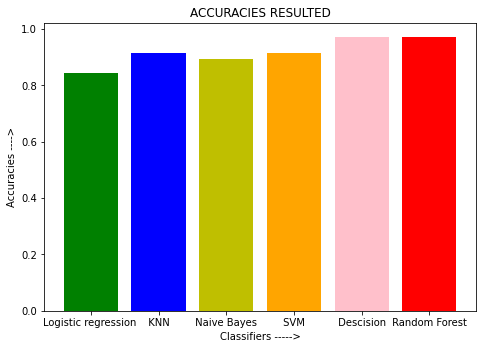

In [42]:
import matplotlib.pyplot as plt 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
algo = ['Logistic regression ','  KNN  ',' Naive Bayes ',' SVM ',' Descision ',' Random Forest '] 
accuracy = [model1.score(X,Y),model2.score(X,Y),model3.score(X,Y),model4.score(X,Y),model5.score(X,Y),model6.score(X,Y)] 
ax.bar(algo[0],accuracy[0],color = 'g') 
ax.bar(algo[1],accuracy[1],color = 'b') 
ax.bar(algo[2],accuracy[2],color = 'y') 
ax.bar(algo[3],accuracy[3],color = 'orange') 
ax.bar(algo[4],accuracy[4],color = 'pink') 
ax.bar(algo[5],accuracy[5],color = 'r') 
plt.xlabel('Classifiers ----->') 
plt.ylabel('Accuracies ---->') 
plt.title('ACCURACIES RESULTED') 
plt.show()